# Prática 02 - k-NN e Avaliação de Classificadores

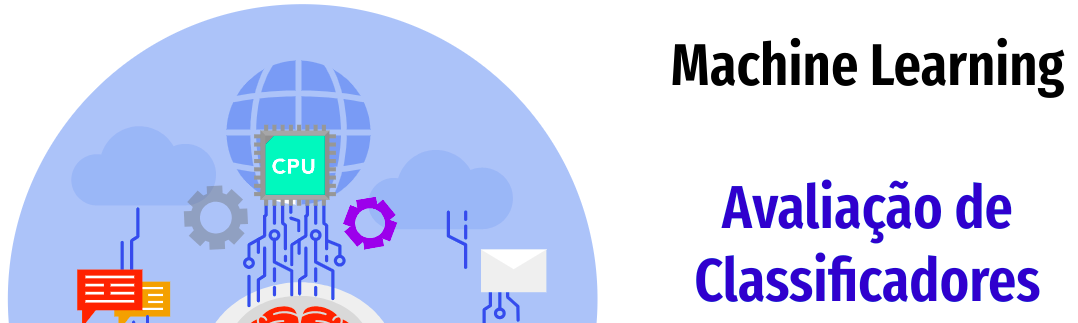


**Pessoa estudante**:  INSIRA SEU NOME AQUI! (seuemail@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é construir um classificador para predizer as pessoas que sobreviveram, ou não, ao desastre do RMS Titanic. Desta forma vocês devem importar o dataset do Titanic da última prática, considerando as colunas que vocês julgam interessante para construir o modelo de classificação da coluna 'Survived'. É de extrema importância levar em consideração os insights e etapa de pré-processamento realizado na Prática 01.
```

**Instruções para a prática.**

1. Importar o dataset do titanic da forma que você julga interessante para classficar se a pessoa sobreviveu ou não.

2. Realizar as etapas nas correspondentes celulas, contendo instruções/dicas e a respectiva pontuação da prática.

3. **Submeter no Classroom até a data limite. Após o prazo limite, punição de 10 pontos por dia de atraso.**

4. Use o chatGPT com moderação. Ele nao acerta sempre nao viu? 😅



In [ ]:
# Celula de definicao das libraries/dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice
# Importe outras libraries que vc ira usar aqui!
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Lembre que o dataset da prática 1 é o do link abaixo
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

Dica: tente importar o .csv da sua prática, talvez você já consiga importar aqui!

## Parte 1 - Importação do Dataset

**Pontuação: 5 pontos**

Considerando o dataset do Titanic da última prática (Prática 01), importe o mesmo com o seu respectivo pré-processamento e indique as colunas que você julga de interesse para o processo de classificação.

In [ ]:
# Dica 1 - Lembrar de importar a coluna 'Survived', afinal é ela que queremos predizer com o classificador! =)

In [ ]:
# Dica 2 - Se você importou os dados com uma técnica de padronização, e não se sentiu feliz com o resultado do classificador/modelo...
# que tal importar o dataset do zero de novo e realizar uma nova etapa de pré-processamento? [você pode fazer isso, apesar do re-trabalho]

In [ ]:
# ATENÇÃO, ASSEGURE QUE VOCÊ ESTÁ IMPORTANDO O MESMO DATASET UTILIZADO NA PRÁTICA PASSADA!
# disponível em https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

**Vocês provavelmente irão manipular o DataFrame mais de uma vez nesta prática, minha sugestão é que vocês salvem o DataFrame inicial e o chamem atraveś de um função**.

In [ ]:
# esta célula contém código exemplo!

def get_titanic_dataset():
  df = titanic.copy()

  return df

**Caso vocês realizem alguma etapa do pré-processamento de forma distinta, sugiro continuar realizando outras funções para ir retornando esses dataframes para as células seguintes.**

In [ ]:
# esta célula contém código exemplo!

def get_df_pipeline1(df: pd.DataFrame):
  # sugiro colocar como entrada o dataset original, executar sua Pipeline
  df = df.copy()
  # limpeza, substituicao de nulos
  median_age = titanic['Age'].median()
  df['Age'].fillna(median_age, inplace=True)
  # df.dropna(subset=['Embarked'], inplace=True)
  df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

  # encoding
  le = preprocessing.LabelEncoder()
  df['Sex_Encoded'] = le.fit_transform(df['Sex'])
  df.drop(['Sex'], axis=1, inplace=True)

  return df

In [ ]:
df = get_df_pipeline1(titanic)

**Fique a vontade de usar a função [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) do Sklearn também =)**

## Parte 2 - Experimento I - Classificação k-NN TODO: DIFERENTES K, COMENTAR

**Pontuação: 35 pontos**

Nesta primeira parte nosso objetivo será criar o melhor classificador possível para predizer o status de 'Survived' das instâncias da base do Titanic. Dessa forma, vocês possuem o desafio de criar um classificador com o k-NN. Note que vocês possuem a missão de definir os parâmetros do classificador (valor de k, métrica de distância utilizada e etc).

Para seguir com este desafio, siga as etapas abaixo:


1.   Divida seu dataset utilizando o Método Holdout com 70%/30% (sem validação cruzada!).
2.   **Crie um classificador k-NN com o conjunto de treinamento**.
3.   Use o classificador criado em (2) para avaliar o resultado na base de teste. **Apresente o resultado do seu melhor classificador indicando os parâmetros do mesmo (valor de k, métrica de distância). Apresente a matriz de confusão para a base de teste para seu melhor classificador.**

PS: Sinta-se à vontade para criar gráficos. Lembre das etapas importantes ao considerar o treinamento e teste do k-NN!

**DICAS:**

*   Usar GridSearch para definir os melhores parâmetros para classificador. Confira este [artigo](https://www.datasklr.com/select-classification-methods/k-nearest-neighbors)




In [ ]:
  # scaling
  scaler = preprocessing.MinMaxScaler()

In [ ]:
# X_train -- dados para construcao de um futuro modelo.
# X_test  -- dados para testar um futuro modelo.
# y_train -- label para os dados referentes ao conjunto de treinamento.
# y_test  -- label para os dados referentes ao conjunto de teste.

titanic_y = df["Survived"]
titanic_x = df.copy()
titanic_x.drop("Survived", axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.30, random_state=42)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
k_values = [i for i in range (1,31, 2)]
accuracies = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append([accuracy, k])

In [ ]:
# classifier = KNeighborsClassifier(n_neighbors=9)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# print(y_pred)  # printei so pra ver se os valores estao discretos mesmo

max = [-1, 0]
for i in accuracies:
  if i[0] > max[0]:
    max = i
print(max)

[0.8171641791044776, 3]


Observado acima que para essa base o melhor valor de k é 3, apresentando uma acuracia ao redor de 81%

In [ ]:
def plot_confusion_matrix(y_real, y_test):
  cm = confusion_matrix(y_test, y_pred)

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.4)  # for label size
  sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

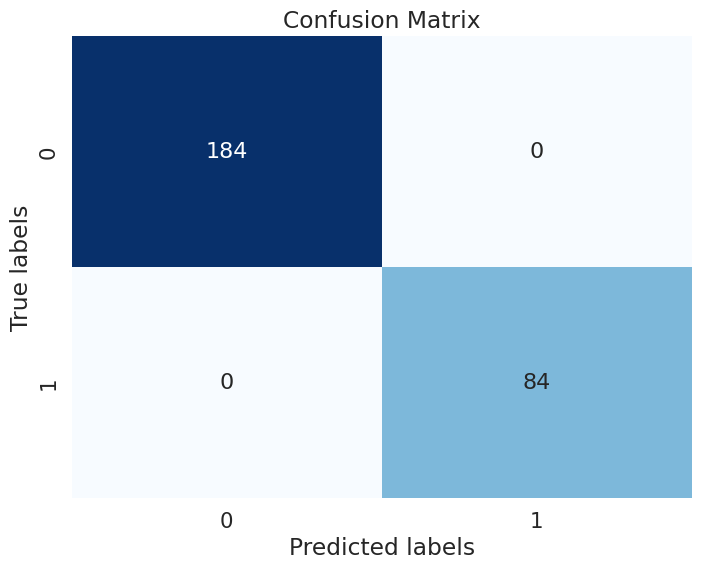

In [ ]:
plot_confusion_matrix(y_test, y_pred)

## Parte 3 - Experimento II - Classificação k-NN com Validação Cruzada TODO: CM

**Pontuação: 35 pontos**

Em nosso segundo experimento, vamos agora aplicar o processo de validação cruzada para poder garantir de fato que temos o melhor modelo possível, utilizando o k-NN!

Volte a prática do Titanic e avalie o seu modelo de acordo com as métricas abordadas na base de testes:

1. Treine novamente um classificador kNN ainda com o melhor valor de k
encontrando anteriormente, porém utilizando validação cruzada com 5 folds. **Exiba os resultados de Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score.**

3. Descubra o melhor valor de k novamente, agora executando várias vezes a validação cruzada com diferentes valores possíveis (mude o número de folds!).Avalie o seu modelo de acordo com as métricas abordadas na base de testes: Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score





In [ ]:
X = get_df_pipeline1(titanic)
y = X["Survived"]
X.drop("Survived", axis=1, inplace=True)

X = scaler.fit_transform(X)
k = 3

In [ ]:
# Define custom scoring function to compute confusion matrix
def confusion_matrix_scorer(y_true, y_pred):
    # y_pred = estimator.predict(X)
    return plot_confusion_matrix(y_true, y_pred)

# Define custom scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    # 'cm': make_scorer(confusion_matrix_scorer)
}

Vamos rodar o experimento várias vezes com diferentes números de fold (a partir de 5)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=k)
scores = cross_validate(classifier, X, y, cv=5, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in islice(scoring.keys(), 4):
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7946519364760529
Precision: 0.7357745213243934
Recall: 0.7280477408354645
F1: 0.7311004398664093


In [ ]:
scores = cross_validate(classifier, X, y, cv=6, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.8047644960396639
Precision: 0.7553937321129996
Recall: 0.7309941520467836
F1: 0.7406245109092944


In [ ]:
scores = cross_validate(classifier, X, y, cv=7, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7902137232845894
Precision: 0.7290536010285805
Recall: 0.7312925170068028
F1: 0.7270231691925529


In [ ]:
scores = cross_validate(classifier, X, y, cv=8, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7925012065637066
Precision: 0.7350700268460648
Recall: 0.7254983388704319
F1: 0.7282890338383267


In [ ]:
scores = cross_validate(classifier, X, y, cv=9, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7912457912457912
Precision: 0.7338248225880681
Recall: 0.7222222222222222
F1: 0.7237950012752697


In [ ]:
scores = cross_validate(classifier, X, y, cv=10, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


Observa-se acima a melhor acurácia média e precisão média no 6-fold.

## Parte 4 - Avaliação de Classificadores

Considerando as técnicas k-NN, SVM e Naive Bayes e usando técnicas de Validação Cruzada:

1.   Defina os melhores parâmetros para cade técnica.
2.   Analise as métricas de classificação (Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score) para um classificador baseado.


**Pontuação: 25 pontos**






### Naive Bayes

In [ ]:
nb_classifier = GaussianNB()
cv_scores = cross_validate(nb_classifier, X, y, cv=5, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
nb_classifier = GaussianNB()
cv_scores = cross_validate(nb_classifier, X, y, cv=6, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
nb_classifier = GaussianNB()
cv_scores = cross_validate(nb_classifier, X, y, cv=7, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
nb_classifier = GaussianNB()
cv_scores = cross_validate(nb_classifier, X, y, cv=8, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
nb_classifier = GaussianNB()
cv_scores = cross_validate(nb_classifier, X, y, cv=9, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
nb_classifier = GaussianNB()
cv_scores = cross_validate(nb_classifier, X, y, cv=10, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


### SVM

In [ ]:
svm_classifier = SVC(kernel='linear')
cv_scores = cross_validate(svm_classifier, X, y, cv=5, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
svm_classifier = SVC(kernel='linear')
cv_scores = cross_validate(svm_classifier, X, y, cv=6, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
svm_classifier = SVC(kernel='linear')
cv_scores = cross_validate(svm_classifier, X, y, cv=7, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
svm_classifier = SVC(kernel='linear')
cv_scores = cross_validate(svm_classifier, X, y, cv=8, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
svm_classifier = SVC(kernel='linear')
cv_scores = cross_validate(svm_classifier, X, y, cv=9, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


In [ ]:
svm_classifier = SVC(kernel='linear')
cv_scores = cross_validate(svm_classifier, X, y, cv=10, scoring=scoring)
# Print the cross-validation scores
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732


### k-NN

In [ ]:
scores = cross_validate(classifier, X, y, cv=5, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7946519364760529
Precision: 0.7357745213243934
Recall: 0.7280477408354645
F1: 0.7311004398664093


In [ ]:
scores = cross_validate(classifier, X, y, cv=6, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.8047644960396639
Precision: 0.7553937321129996
Recall: 0.7309941520467836
F1: 0.7406245109092944


In [ ]:
scores = cross_validate(classifier, X, y, cv=7, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7902137232845894
Precision: 0.7290536010285805
Recall: 0.7312925170068028
F1: 0.7270231691925529


In [ ]:
scores = cross_validate(classifier, X, y, cv=8, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7925012065637066
Precision: 0.7350700268460648
Recall: 0.7254983388704319
F1: 0.7282890338383267


In [ ]:
scores = cross_validate(classifier, X, y, cv=9, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7912457912457912
Precision: 0.7338248225880681
Recall: 0.7222222222222222
F1: 0.7237950012752697


In [ ]:
scores = cross_validate(classifier, X, y, cv=10, scoring=scoring)
# print(scores)
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean()}")

Cross-validation results:
Accuracy: 0.7958676654182273
Precision: 0.7446550812724706
Recall: 0.7192436974789915
F1: 0.7282838731949732
